In [1]:
from database.load_data import load_sql
import pandas as pd

In [45]:
df6 = load_sql("dataset_60s")
df7 = load_sql("dataset_70s")
df8 = load_sql("dataset_80s")
df9 = load_sql("dataset_90s")
df0 = load_sql("dataset_00s")
df1 = load_sql("dataset_10s")

dfs = [df6, df7, df8, df9, df0, df1]
decades = [1960, 1970, 1980, 1990, 2000, 2010]

In [46]:
[df.insert(loc=3, column='decade', value=decade) for df, decade in zip(dfs, decades)]

[None, None, None, None, None, None]

In [47]:
df_merged = pd.concat(dfs, axis=0)
df_merged[:10]

,track,artist,uri,decade,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
index,,,,,,,,,,,,,,,,,,,,
0,Jealous Kind Of Fella,Garland Green,spotify:track:1dtKN6wwlolkM8XZy2y9C1,1960,0.417,0.620,3,-7.727,1,0.0403,0.4900,0.000000,0.0779,0.845,185.655,173533,3,32.94975,9,1
1,Initials B.B.,Serge Gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,1960,0.498,0.505,3,-12.475,1,0.0337,0.0180,0.107000,0.1760,0.797,101.801,213613,4,48.82510,10,0
2,Melody Twist,Lord Melody,spotify:track:6uk8tI6pwxxdVTNlNOJeJh,1960,0.657,0.649,5,-13.392,1,0.0380,0.8460,0.000004,0.1190,0.908,115.940,223960,4,37.22663,12,0
3,Mi Bomba Sonó,Celia Cruz,spotify:track:7aNjMJ05FvUXACPWZ7yJmv,1960,0.590,0.545,7,-12.058,0,0.1040,0.7060,0.024600,0.0610,0.967,105.592,157907,4,24.75484,8,0
4,Uravu Solla,P. Susheela,spotify:track:1rQ0clvgkzWr001POOPJWx,1960,0.515,0.765,11,-3.515,0,0.1240,0.8570,0.000872,0.2130,0.906,114.617,245600,4,21.79874,14,0
5,Beat n. 3,Ennio Morricone,spotify:track:32VBSoD2vcoIOiPEvAfFXU,1960,0.697,0.673,0,-10.573,1,0.0266,0.7140,0.919000,0.1220,0.778,112.117,167667,4,65.48604,7,0
6,Samba De Uma Nota So (One Note Samba),Antônio Carlos Jobim,spotify:track:62eoocmGk59EMfuRcLBvUL,1960,0.662,0.272,0,-18.883,1,0.0313,0.3600,0.228000,0.0963,0.591,143.507,134360,4,47.82155,7,0
7,Happy Days,Marv Johnson,spotify:track:0ecGwZA1ReAq4Mn3ZInaT4,1960,0.720,0.624,5,-9.086,0,0.0473,0.7950,0.000000,0.4880,0.887,119.999,160040,4,30.42891,8,1
8,Carolina - Remastered 2006,Caetano Veloso,spotify:track:15gNqKkZN9Mq9AvnRqWJKb,1960,0.545,0.220,2,-15.079,0,0.0828,0.5820,0.239000,0.2690,0.386,118.223,158413,4,47.08099,6,0


In [62]:
items=['danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness',
           'instrumentalness', 'liveness', 'valence', 'tempo', 'chorus_hit', 'sections']

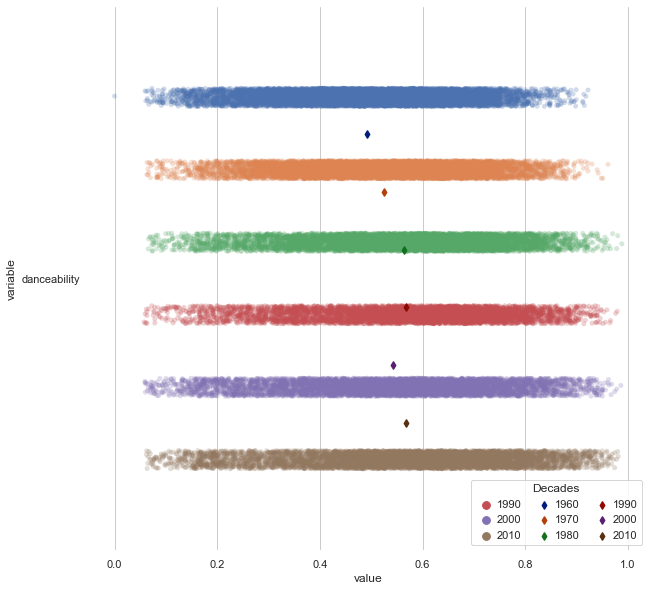

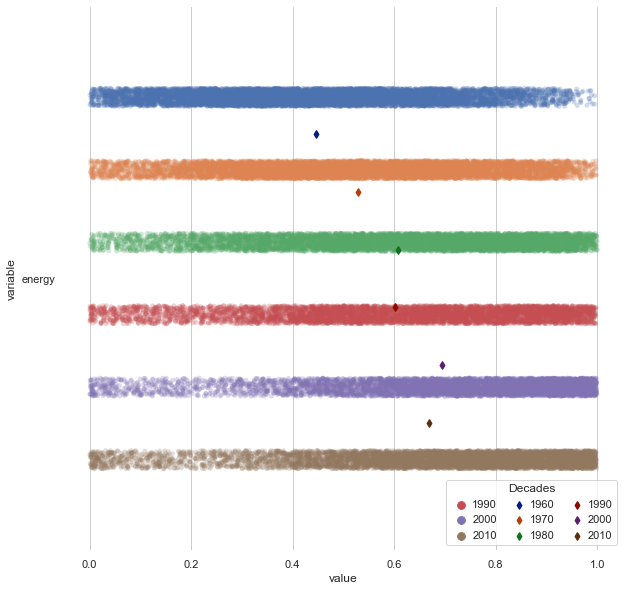

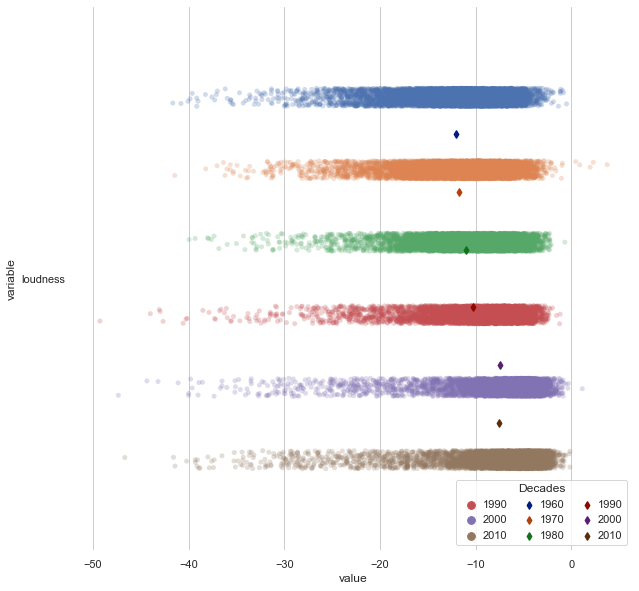

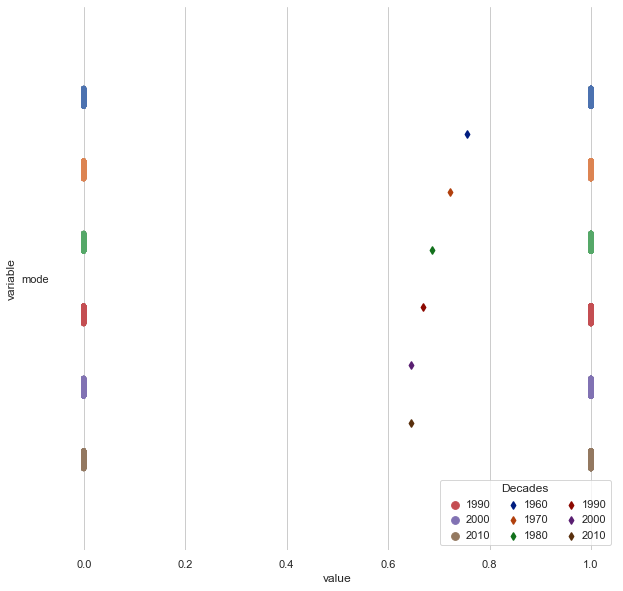

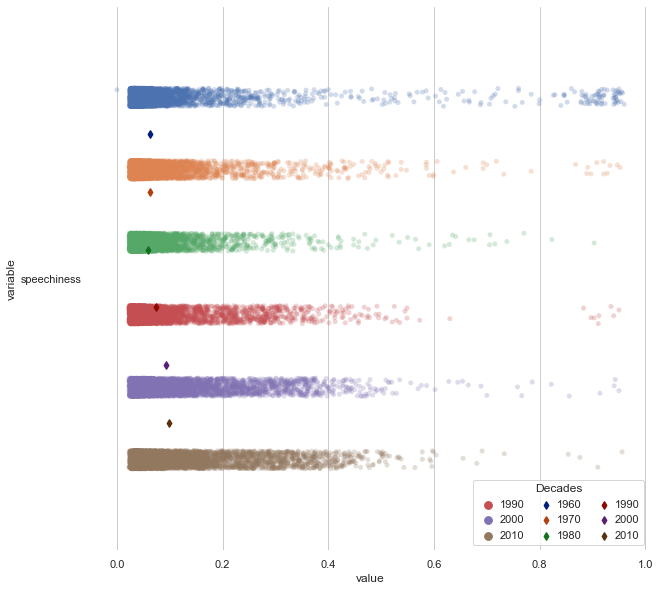

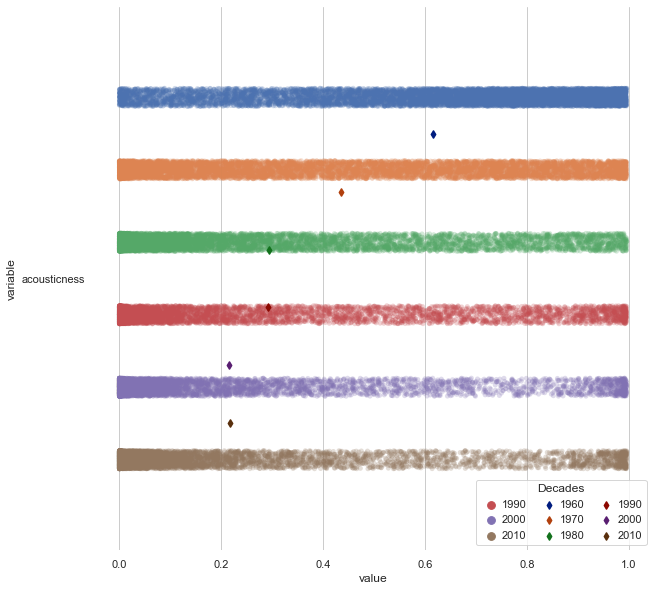

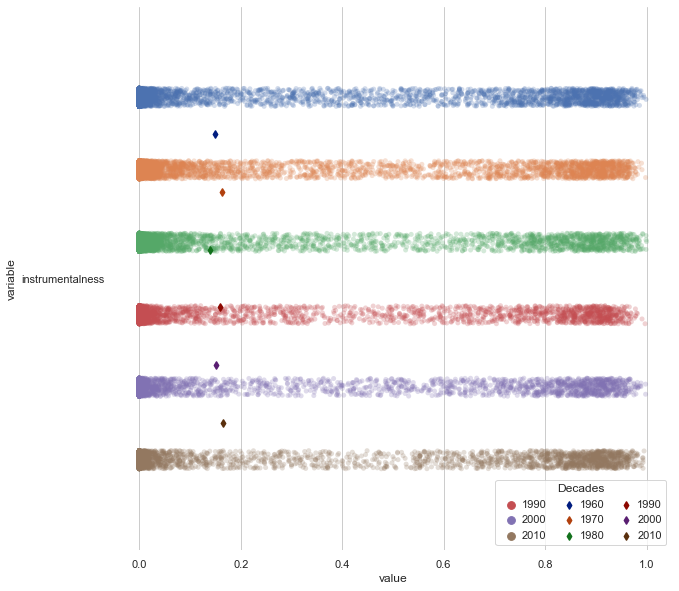

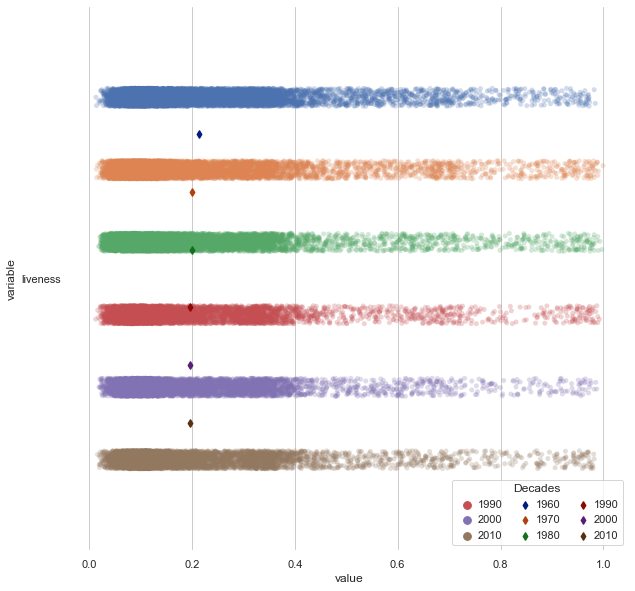

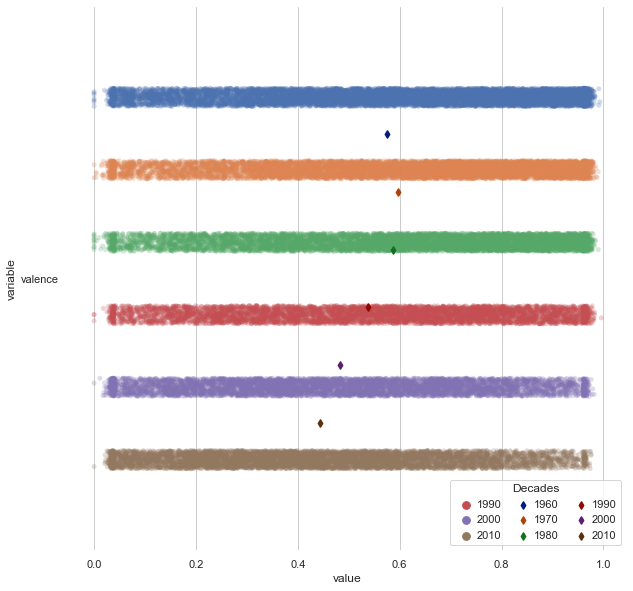

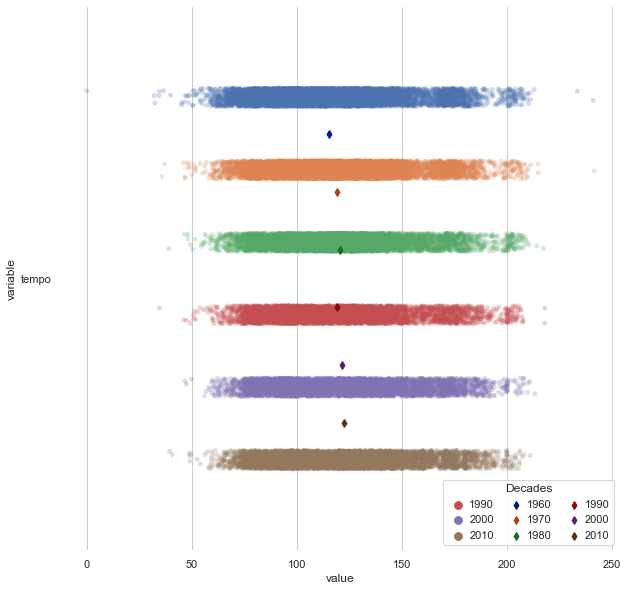

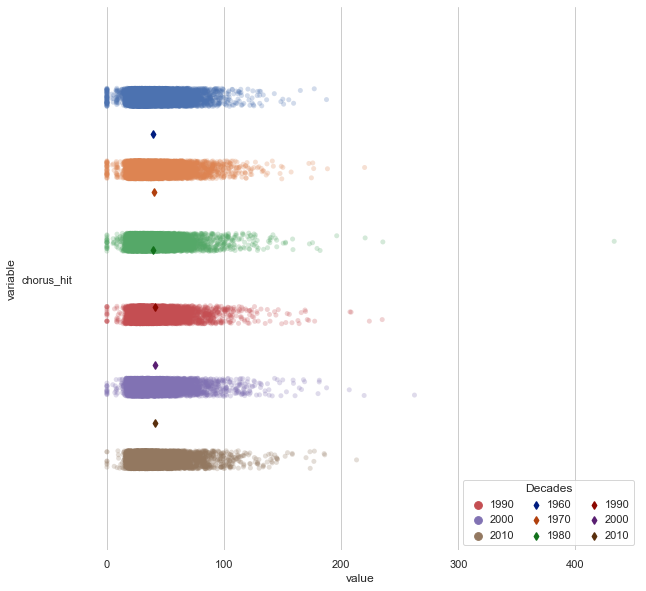

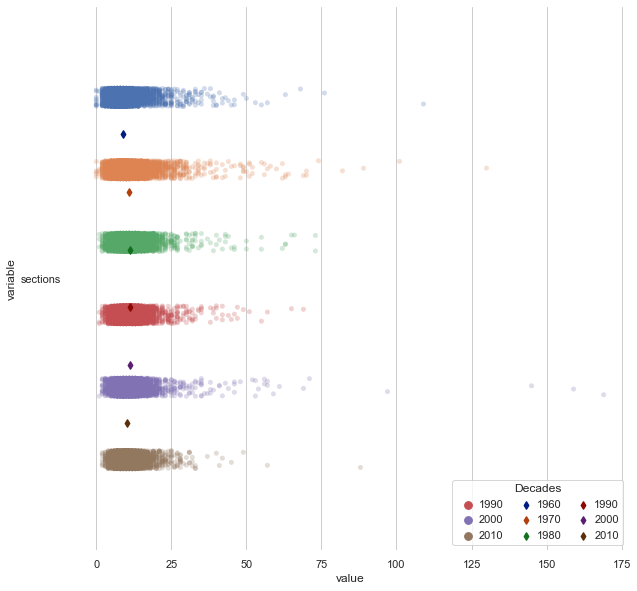

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_theme(style="whitegrid")


for col in items:
    df_melted = pd.melt(df_merged, id_vars=['decade'], value_vars=[col])
    f, ax = plt.subplots(figsize=(10,10))
    sns.despine(bottom=True, left=True)

    sns.stripplot(x="value", y="variable", hue="decade",
                  data=df_melted, dodge=True, alpha=.25, zorder=1)

    sns.pointplot(x="value", y="variable", hue="decade",
                  data=df_melted, dodge=.8 - .8 / 3,
                  join=False, palette="dark",
                  markers="d", scale=.75, ci=None)

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[3:], labels[3:], title="Decades",
              handletextpad=0, columnspacing=1,
              loc="lower right", ncol=3, frameon=True)

    plt.show()